## Importando librerías

In [1]:
import pandas as pd
import numpy as np
import os
from glob import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Nuestro set de datos

In [5]:
image_folder = r'C:\Users\Alessandra\Downloads\sample\images'
labels_file = r'C:\Users\Alessandra\Downloads\sample\sample_labels.csv'

In [ ]:
# Obtener las rutas de todas las imágenes en el folder
image_paths = glob(os.path.join(image_folder, '*.png'))

# Leer el archivo CSV
labels_df = pd.read_csv(labels_file)

# Crear listas para las imágenes y etiquetas
images = []
labels = []

In [6]:
# Itero sobre las rutas y cargo las imagenes
for img_path in image_paths:
    filename = os.path.basename(img_path)
    label = labels_df.loc[labels_df['Position'] == filename, 'Finding Labels'].values[0]
    image = load_img(img_path, target_size=(64, 64))  # Ajustar tamaño de las imágenes
    image = img_to_array(image)
    images.append(image)
    labels.append(label)

# Convierto listas a arrays de NumPy
images = np.array(images, dtype='float32') / 255.0  # Normalizo imágenes
labels = np.array(labels)

#Division los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


Informacion del dataset: 2_Extrapolation_to_All_Series.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39668 entries, 0 to 39667
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         39668 non-null  int64 
 1   SOPInstanceUID     39668 non-null  object
 2   SeriesInstanceUID  39668 non-null  object
 3   StudyInstanceUID   39668 non-null  object
 4   data               39668 non-null  object
 5   labelName          39668 non-null  object
 6   labelType          39668 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.1+ MB


In [7]:
df2.head()

,Unnamed: 0,SOPInstanceUID,SeriesInstanceUID,StudyInstanceUID,data,labelName,labelType
0,0,1.2.276.0.7230010.3.1.4.296485376.1.1521713091...,1.2.276.0.7230010.3.1.3.296485376.1.1521713090...,1.2.276.0.7230010.3.1.2.296485376.1.1521713088...,"{'x': 320.95899, 'y': 235.81072999999998, 'wid...",Intraventricular,selectedThinSlices
1,1,1.2.276.0.7230010.3.1.4.296485376.1.1521713091...,1.2.276.0.7230010.3.1.3.296485376.1.1521713090...,1.2.276.0.7230010.3.1.2.296485376.1.1521713088...,"{'x': 320.95899, 'y': 235.81072999999998, 'wid...",Intraventricular,selectedThinSlices
2,2,1.2.276.0.7230010.3.1.4.296485376.1.1521713091...,1.2.276.0.7230010.3.1.3.296485376.1.1521713090...,1.2.276.0.7230010.3.1.2.296485376.1.1521713088...,"{'x': 320.95899, 'y': 235.81072999999998, 'wid...",Intraventricular,selectedThinSlices
3,3,1.2.276.0.7230010.3.1.4.296485376.1.1521713091...,1.2.276.0.7230010.3.1.3.296485376.1.1521713090...,1.2.276.0.7230010.3.1.2.296485376.1.1521713088...,"{'x': 320.95899, 'y': 235.81072999999998, 'wid...",Intraventricular,selectedThinSlices
4,4,1.2.276.0.7230010.3.1.4.296485376.1.1521713091...,1.2.276.0.7230010.3.1.3.296485376.1.1521713090...,1.2.276.0.7230010.3.1.2.296485376.1.1521713088...,"{'x': 318.53628, 'y': 244.69401000000002, 'wid...",Intraventricular,selectedThinSlices


In [8]:
# Asegurarse de que no haya valores nulos
df2 = df2.dropna()

In [10]:
# Seleccionar las características y las etiquetas
X = df2[['x', 'y', 'width', 'height']]
X

,x,y,width,height
0,320.95899,235.81073,30.68771,52.49210
1,320.95899,235.81073,30.68771,52.49210
2,320.95899,235.81073,30.68771,52.49210
3,320.95899,235.81073,30.68771,52.49210
4,318.53628,244.69401,33.91796,56.52997
...,...,...,...,...
39663,185.47191,73.34831,46.02248,25.16854
39664,179.00000,79.10112,58.96629,28.76405
39665,185.47191,82.69663,64.71910,33.79775
39666,187.62921,86.29213,61.12360,37.39326


In [11]:
y = df2['labelName']
y

0        Intraventricular
1        Intraventricular
2        Intraventricular
3        Intraventricular
4        Intraventricular
               ...       
39663            Epidural
39664            Epidural
39665            Epidural
39666            Epidural
39667            Epidural
Name: labelName, Length: 39668, dtype: object

In [12]:
# Se codifican las 6 etiquetas categóricas utilizando (one-hot encoding)
label_encod = LabelEncoder()
y_encoded = label_encod.fit_transform(y)
print(y_encoded)

y_categorical = to_categorical(y_encoded)
print(y_categorical)

[3 3 3 ... 1 1 1]
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [13]:
# Divido los datos en set de training (80%) y testeo (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Normalizo los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Creando un modelo de datos

##1er modelo multicapas

In [ ]:
def Crear_modelo(num_capas_ocultas, neuronas_por_capa, input_shape, num_clases):
    model = models.Sequential()
    model.add(layers.Dense(neuronas_por_capa, activation='relu', input_shape=input_shape)) #Capa de entraada
    #Capas ocultas
    for _ in range(num_capas_ocultas - 1):
        model.add(layers.Dense(neuronas_por_capa, activation='relu'))
    model.add(layers.Dense(num_clases, activation='softmax'))     #Capa de salida
    return model

In [ ]:
num_capas_ocultas = 18
neuronas_por_capa = 512
input_shape = (X_train.shape[1],)
num_clases = y_categorical.shape[1]
modelo_1 = Crear_modelo(num_capas_ocultas, neuronas_por_capa, input_shape, num_clases)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_238 (Dense)           (None, 512)               2560      
                                                                 
 dense_239 (Dense)           (None, 512)               262656    
                                                                 
 dense_240 (Dense)           (None, 512)               262656    
                                                                 
 dense_241 (Dense)           (None, 512)               262656    
                                                                 
 dense_242 (Dense)           (None, 512)               262656    
                                                                 
 dense_243 (Dense)           (None, 512)               262656    
                                                                 
 dense_244 (Dense)           (None, 512)             

In [ ]:
# Compilo el modelo creado
modelo_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
modelo_1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_238 (Dense)           (None, 512)               2560      
                                                                 
 dense_239 (Dense)           (None, 512)               262656    
                                                                 
 dense_240 (Dense)           (None, 512)               262656    
                                                                 
 dense_241 (Dense)           (None, 512)               262656    
                                                                 
 dense_242 (Dense)           (None, 512)               262656    
                                                                 
 dense_243 (Dense)           (None, 512)               262656    
                                                                 
 dense_244 (Dense)           (None, 512)             

## Entrenando el modelo

In [ ]:
# Entrenar el modelo
history = modelo_1.fit(X_train_scaled, y_train, epochs=30, batch_size=8, validation_split=0.2)

Epoch 1/30
3174/3174 [==============================] - 32s 8ms/step - loss: 1.5643 - accuracy: 0.3285 - val_loss: 1.5586 - val_accuracy: 0.3403
Epoch 2/30
3174/3174 [==============================] - 27s 8ms/step - loss: 1.5594 - accuracy: 0.3336 - val_loss: 1.5566 - val_accuracy: 0.3403
Epoch 3/30
3174/3174 [==============================] - 26s 8ms/step - loss: 1.5590 - accuracy: 0.3336 - val_loss: 1.5562 - val_accuracy: 0.3403
Epoch 4/30
3174/3174 [==============================] - 27s 8ms/step - loss: 1.5586 - accuracy: 0.3336 - val_loss: 1.5556 - val_accuracy: 0.3403
Epoch 5/30
3174/3174 [==============================] - 28s 9ms/step - loss: 1.5582 - accuracy: 0.3336 - val_loss: 1.5562 - val_accuracy: 0.3403
Epoch 6/30
3174/3174 [==============================] - 26s 8ms/step - loss: 1.5578 - accuracy: 0.3336 - val_loss: 1.5598 - val_accuracy: 0.3403
Epoch 7/30
3174/3174 [==============================] - 27s 8ms/step - loss: 1.5582 - accuracy: 0.3336 - val_loss: 1.5575 - val_ac

## Evaluando el modelo sobre data de test

In [ ]:
test_loss, test_acc = modelo_1.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_acc}')

248/248 [==============================] - 2s 7ms/step - loss: 1.5645 - accuracy: 0.3351
Test accuracy: 0.3351399004459381


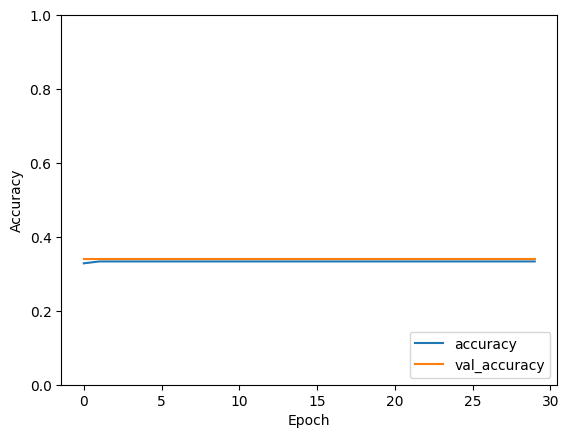

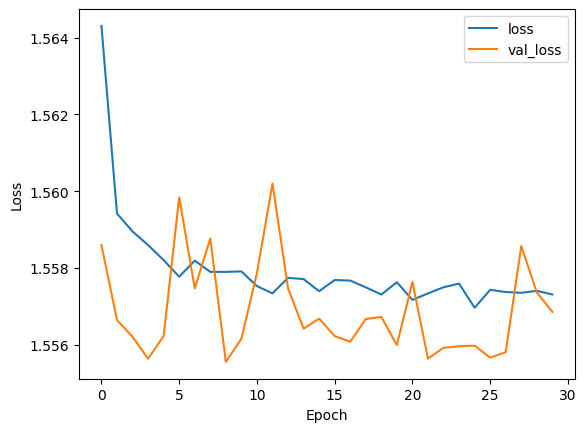

In [ ]:
#Visualizamos la precisión del entrenamiento y de la validación
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#Visualizamos la pérdida del entrenamiento y la validación
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

##2° modelo: Utilizando un modelo con 10 capas (ya no con 25)

In [ ]:
#Creacion del modelo
num_capas_ocultas = 8
neuronas_por_capa = 256
input_shape = (X_train.shape[1],)
num_clases = y_categorical.shape[1]
modelo_2 = Crear_modelo(num_capas_ocultas, neuronas_por_capa, input_shape, num_clases)
modelo_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
modelo_2.summary()
#Entrenamiento (Esta vez disminuimos el numero de epocas y aumentamos el batch para reducir la posibilidad de overfitting)
modelo_2_trained = modelo_2.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)
#Evaluacion del modelo
test_loss, test_acc = modelo_2.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_acc}')

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_266 (Dense)           (None, 256)               1280      
                                                                 
 dense_267 (Dense)           (None, 256)               65792     
                                                                 
 dense_268 (Dense)           (None, 256)               65792     
                                                                 
 dense_269 (Dense)           (None, 256)               65792     
                                                                 
 dense_270 (Dense)           (None, 256)               65792     
                                                                 
 dense_271 (Dense)           (None, 256)               65792     
                                                                 
 dense_272 (Dense)           (None, 256)             

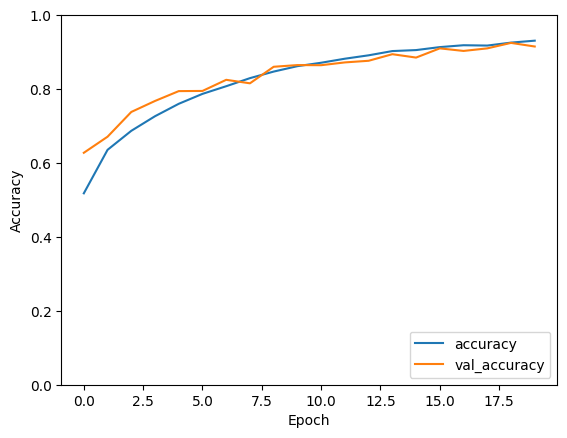

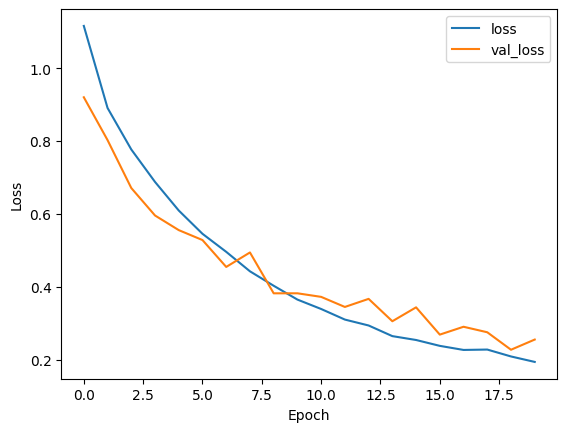

In [ ]:
#Visualizamos la precisión del entrenamiento y de la validación
plt.plot(modelo_2_trained.history['accuracy'], label='accuracy')
plt.plot(modelo_2_trained.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#Visualizamos la pérdida del entrenamiento y la validación
plt.plot(modelo_2_trained.history['loss'], label='loss')
plt.plot(modelo_2_trained.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## 3er modelo:Utilizando regularization

In [ ]:
from keras import regularizers

In [ ]:
modelo_3 = models.Sequential()
modelo_3.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.001)))
for _ in range(18):
    modelo_3.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

modelo_3.add(layers.Dense(y_categorical.shape[1], activation='softmax'))
# Compilo el modelo creado
modelo_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
modelo_3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_275 (Dense)           (None, 512)               2560      
                                                                 
 dense_276 (Dense)           (None, 512)               262656    
                                                                 
 dense_277 (Dense)           (None, 512)               262656    
                                                                 
 dense_278 (Dense)           (None, 512)               262656    
                                                                 
 dense_279 (Dense)           (None, 512)               262656    
                                                                 
 dense_280 (Dense)           (None, 512)               262656    
                                                                 
 dense_281 (Dense)           (None, 512)             

In [ ]:
#Entrenamos el modelo
modelo_3_trained = modelo_3.fit(X_train_scaled, y_train, epochs=30, batch_size=8, validation_split=0.2)

Epoch 1/30
3174/3174 [==============================] - 36s 9ms/step - loss: 1.6444 - accuracy: 0.3323 - val_loss: 1.5555 - val_accuracy: 0.3403
Epoch 2/30
3174/3174 [==============================] - 30s 9ms/step - loss: 1.5594 - accuracy: 0.3336 - val_loss: 1.5565 - val_accuracy: 0.3403
Epoch 3/30
3174/3174 [==============================] - 32s 10ms/step - loss: 1.5589 - accuracy: 0.3336 - val_loss: 1.5565 - val_accuracy: 0.3403
Epoch 4/30
3174/3174 [==============================] - 30s 9ms/step - loss: 1.5580 - accuracy: 0.3336 - val_loss: 1.5569 - val_accuracy: 0.3403
Epoch 5/30
3174/3174 [==============================] - 30s 9ms/step - loss: 1.5585 - accuracy: 0.3336 - val_loss: 1.5559 - val_accuracy: 0.3403
Epoch 6/30
3174/3174 [==============================] - 33s 10ms/step - loss: 1.5582 - accuracy: 0.3336 - val_loss: 1.5566 - val_accuracy: 0.3403
Epoch 7/30
3174/3174 [==============================] - 30s 9ms/step - loss: 1.5583 - accuracy: 0.3336 - val_loss: 1.5554 - val_

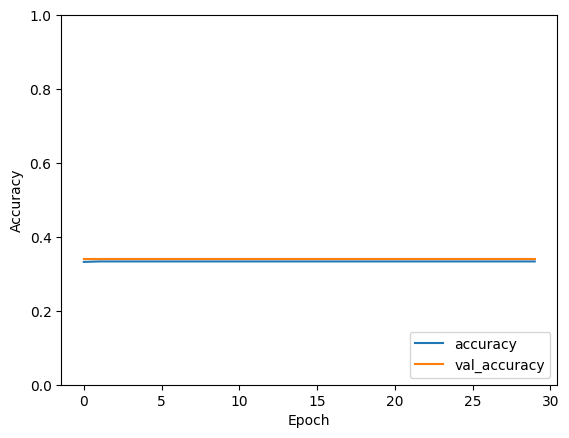

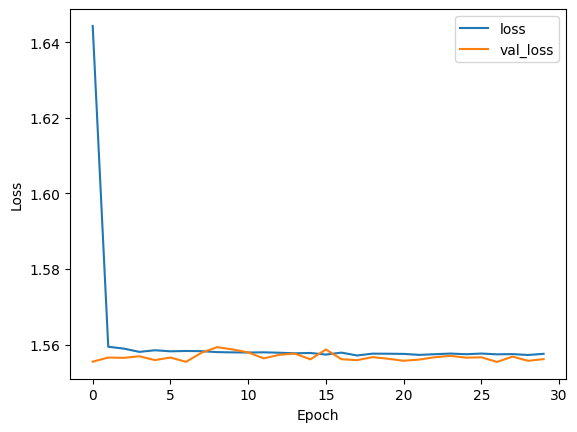

In [ ]:
#Visualizamos la precisión del entrenamiento y de la validación
plt.plot(modelo_3_trained.history['accuracy'], label='accuracy')
plt.plot(modelo_3_trained.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#Visualizamos la pérdida del entrenamiento y la validación
plt.plot(modelo_3_trained.history['loss'], label='loss')
plt.plot(modelo_3_trained.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

##4to modelo: Utilizando Dropout

In [ ]:
modelo_4 = models.Sequential()
modelo_4.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
modelo_4.add(layers.Dropout(0.5))  #Capa dropout
for _ in range(18):
    modelo_4.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    modelo_4.add(layers.Dropout(0.5))  #Capa dropout despues de cada capa oculta
modelo_4.add(layers.Dense(y_categorical.shape[1], activation='softmax'))
# Compilo el modelo creado
modelo_4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
modelo_4.summary()
#Entrenamos el modelo
modelo_4_trained = modelo_4.fit(X_train_scaled, y_train, epochs=30, batch_size=8, validation_split=0.2)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_334 (Dense)           (None, 512)               2560      
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_335 (Dense)           (None, 512)               262656    
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 dense_336 (Dense)           (None, 512)               262656    
                                                                 
 dropout_21 (Dropout)        (None, 512)               0         
                                                                 
 dense_337 (Dense)           (None, 512)             

In [ ]:
#Evaluación del modelo
test_loss, test_acc = modelo_4.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_acc}')

248/248 [==============================] - 1s 4ms/step - loss: 1.5647 - accuracy: 0.3351
Test accuracy: 0.3351399004459381


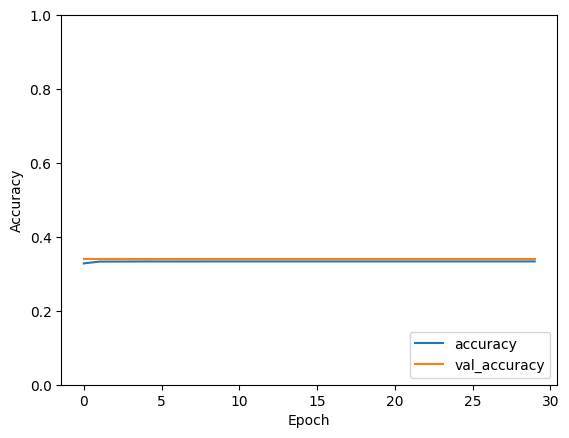

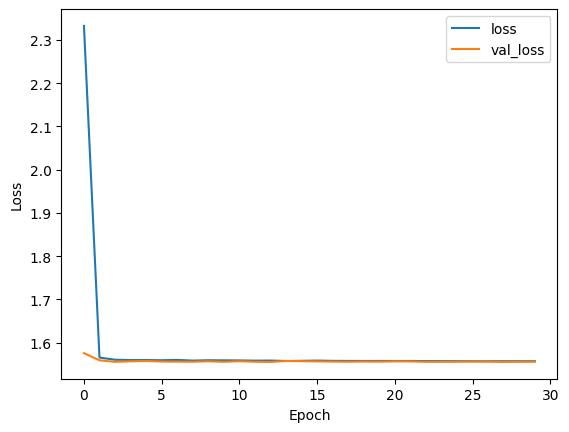

In [ ]:
#Visualizamos la precisión del entrenamiento y de la validación
plt.plot(modelo_4_trained.history['accuracy'], label='accuracy')
plt.plot(modelo_4_trained.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#Visualizamos la pérdida del entrenamiento y la validación
plt.plot(modelo_4_trained.history['loss'], label='loss')
plt.plot(modelo_4_trained.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## 5to modelo: Combinación de reducción del número de capas ocultas, utilizando regularizacion, dropout, reduciendo número de épocas y aumentando el batch size

In [ ]:
modelo_5 = models.Sequential()
modelo_5.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.l2(0.001)))
for _ in range(8):
    modelo_5.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    modelo_5.add(layers.Dropout(0.5))
modelo_5.add(layers.Dense(y_categorical.shape[1], activation='softmax'))
modelo_5.summary()
modelo_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Entrenamiento del modelo
modelo_5_trained = modelo_5.fit(X_train_scaled, y_train, epochs=20, batch_size=32,validation_split=0.2)

#Evaluación del modelo
test_loss, test_acc = modelo_5.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_acc}')

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_372 (Dense)           (None, 256)               1280      
                                                                 
 dense_373 (Dense)           (None, 256)               65792     
                                                                 
 dropout_52 (Dropout)        (None, 256)               0         
                                                                 
 dense_374 (Dense)           (None, 256)               65792     
                                                                 
 dropout_53 (Dropout)        (None, 256)               0         
                                                                 
 dense_375 (Dense)           (None, 256)               65792     
                                                                 
 dropout_54 (Dropout)        (None, 256)             

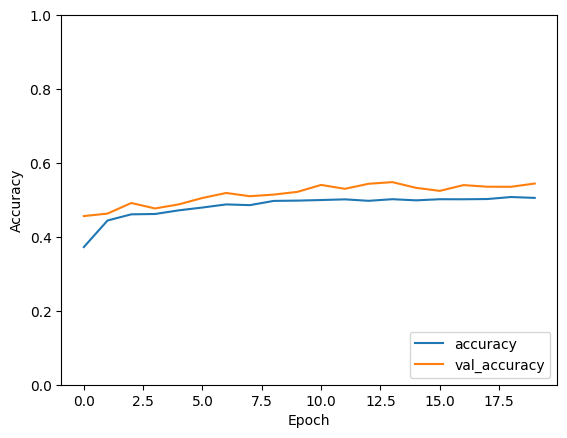

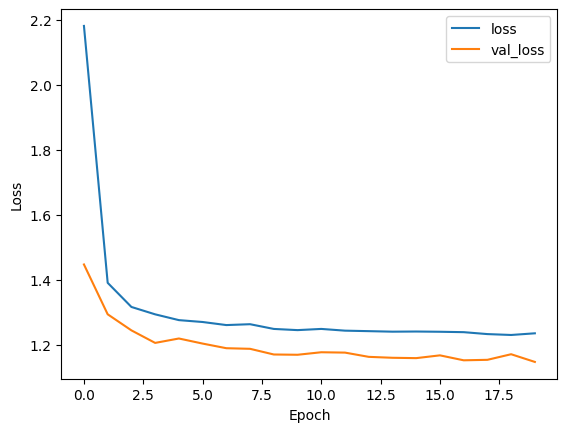

In [ ]:
#Visualizamos la precisión del entrenamiento y de la validación
plt.plot(modelo_5_trained.history['accuracy'], label='accuracy')
plt.plot(modelo_5_trained.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#Visualizamos la pérdida del entrenamiento y la validación
plt.plot(modelo_5_trained.history['loss'], label='loss')
plt.plot(modelo_5_trained.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## 6to modelo: Utilizando solo regularizacion y un numero pequeño de capas ocultas

In [ ]:
modelo_6 = models.Sequential()
modelo_6.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.l2(0.001)))
for _ in range(8):
    modelo_6.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
modelo_6.add(layers.Dense(y_categorical.shape[1], activation='softmax'))
modelo_6.summary()
modelo_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Entrenamiento del modelo
modelo_6_trained = modelo_6.fit(X_train_scaled, y_train, epochs=20, batch_size=32,validation_split=0.2)

#Evaluación del modelo
test_loss, test_acc = modelo_6.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_acc}')

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_382 (Dense)           (None, 256)               1280      
                                                                 
 dense_383 (Dense)           (None, 256)               65792     
                                                                 
 dense_384 (Dense)           (None, 256)               65792     
                                                                 
 dense_385 (Dense)           (None, 256)               65792     
                                                                 
 dense_386 (Dense)           (None, 256)               65792     
                                                                 
 dense_387 (Dense)           (None, 256)               65792     
                                                                 
 dense_388 (Dense)           (None, 256)             

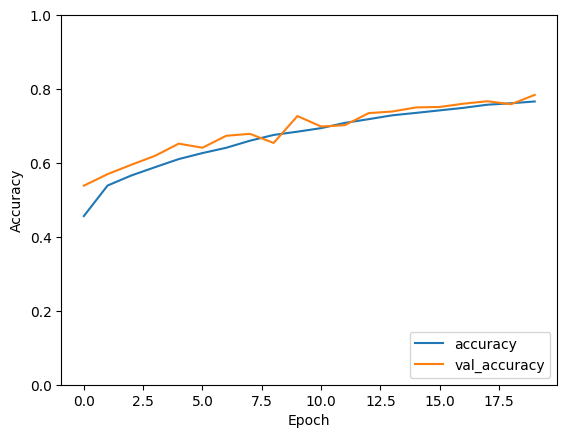

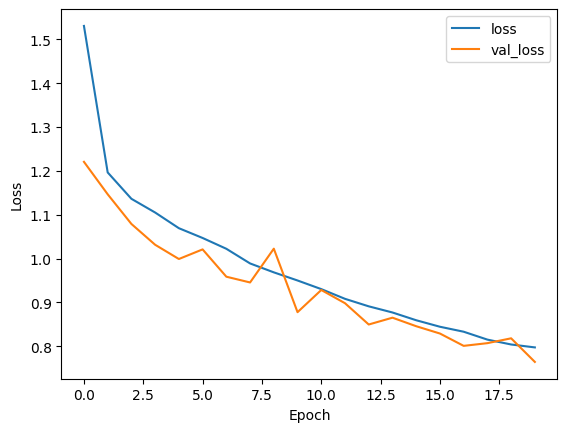

In [ ]:
#Visualizamos la precisión del entrenamiento y de la validación
plt.plot(modelo_6_trained.history['accuracy'], label='accuracy')
plt.plot(modelo_6_trained.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#Visualizamos la pérdida del entrenamiento y la validación
plt.plot(modelo_6_trained.history['loss'], label='loss')
plt.plot(modelo_6_trained.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Comparando los resultados de cada modelo, cuando el numero de capas ocultas es alto (en este caso tan solo 18 capas), el numero de epocas es mayor, el modelo tiende a un ligero overfitting al comparar el entrenamiento con el proceso de validacion en el tiempo, pero sobre todo, presenta un accuracy bajo.

Al reducir el numero de capas ocultas a 8, el accuracy y la perdida (loss) se asemeja entre el entrenamiento y validacion y se alcanza un accuracy promedio de 0.9203428030014038. Este valor, es el más alto alcanzado, incluso mayor al accuracy que se obtiene al mezclar modelos con dropout y regularizacion juntos.


##Claisificacion con Modelo CNN

In [21]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [20]:
def Crear_modelo_CNN(input_shape, num_clases):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_clases, activation='softmax'))

    return model

In [23]:
#Definicion de la forma del tensor de entrada:https://www.tensorflow.org/tutorials/images/cnn
print(X_train.shape)
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
num_clases = y_categorical.shape[1]

(31734, 4)


IndexError: tuple index out of range

In [19]:
#Modelo CNN
modelCNN = models.Sequential()
modelCNN.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1],)))
modelCNN.add(layers.MaxPooling2D((2, 2)))
modelCNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelCNN.add(layers.MaxPooling2D((2, 2)))
modelCNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelCNN.add(layers.Flatten())
modelCNN.add(layers.Dense(64, activation='relu'))
modelCNN.add(layers.Dense(10))

ValueError: Input 0 of layer "conv2d_4" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 4)

In [ ]:
#Creacion del modelo
modelo_cnn = Crear_modelo_CNN(input_shape, num_clases)

#Compilamos el modelo
modelo_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
modelo_cnn.summary()

In [ ]:
# Entrenamiento del modelo
modelo_cnn_trained = modelo_cnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


In [ ]:
# Evaluación del modelo
test_loss, test_acc = modelo_cnn.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


In [15]:
modelCNN.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7899f9906380>>

In [ ]:
'''
# Divido los datos en set de training (80%) y testeo (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Normalizo los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''

In [ ]:
def Crear_modelo(num_capas_ocultas, neuronas_por_capa, input_shape, num_clases):
    model = models.Sequential()
    model.add(layers.Dense(neuronas_por_capa, activation='relu', input_shape=input_shape)) #Capa de entraada
    #Capas ocultas
    for _ in range(num_capas_ocultas - 1):
        model.add(layers.Dense(neuronas_por_capa, activation='relu'))
    model.add(layers.Dense(num_clases, activation='softmax'))     #Capa de salida
    return model

In [ ]:
'''
#Creacion del modelo
num_capas_ocultas = 8
neuronas_por_capa = 256
input_shape = (X_train.shape[1],)
num_clases = y_categorical.shape[1]
modelo_2 = Crear_modelo(num_capas_ocultas, neuronas_por_capa, input_shape, num_clases)
modelo_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
modelo_2.summary()
#Entrenamiento (Esta vez disminuimos el numero de epocas y aumentamos el batch para reducir la posibilidad de overfitting)
modelo_2_trained = modelo_2.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)
#Evaluacion del modelo
test_loss, test_acc = modelo_2.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_acc}')
'''
